In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
inp = pd.read_csv("./Advertising.csv")

In [4]:
inp0= inp[inp.columns[1:]]
inp0

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
inp0.isnull().sum(axis=0)

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [7]:
inp0.describe()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


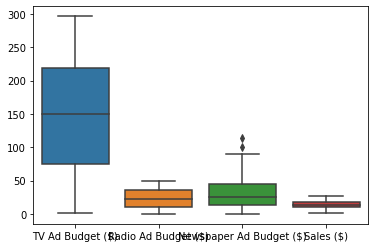

In [8]:
sns.boxplot(inp0[inp0.columns])
plt.show()

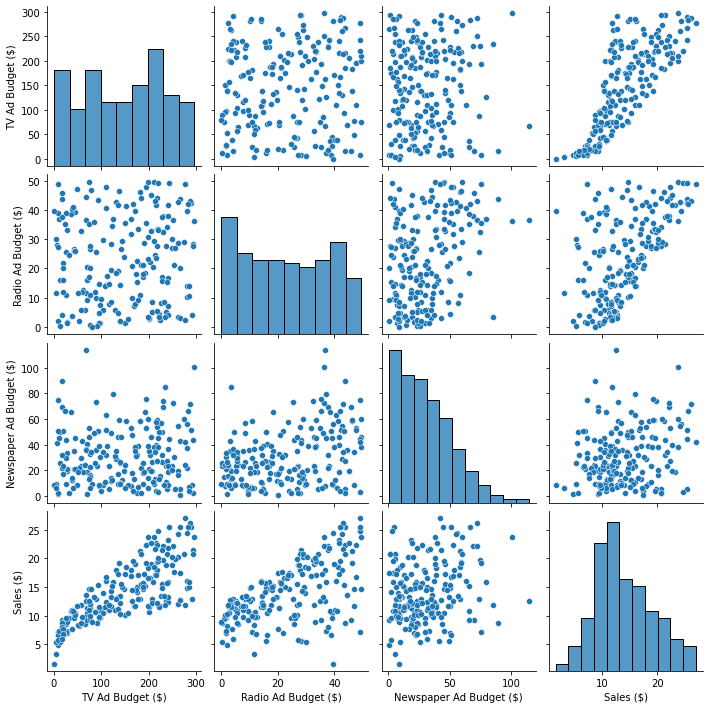

In [9]:
sns.pairplot(data=inp0)

In [10]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(inp0, train_size = 0.7, random_state = 100)


In [11]:
target = 'Sales ($)'
y_train = df_train.pop(target)
X_train = df_train

In [12]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)

In [13]:
model = model.fit()

In [14]:

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Sales ($)   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              2277.
Date:                Thu, 26 Oct 2023   Prob (F-statistic):                   1.21e-116
Time:                        03:33:49   Log-Likelihood:                         -301.87
No. Observations:                 140   AIC:                                      609.7
Df Residuals:                     137   BIC:                                      618.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
TV Ad Budget ($)            0.0523      0.002     33.323      0.000       0.049       0.055
Radio Ad Budget ($)         0.2229      0.012     19.104      0.000       0.200       0.246
Newspaper Ad Budget ($)     0.0192      0.008      2.299      0.023       0.003       0.036
==============================================================================
Omnibus:                        6.301   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                7.346
Skew:                          -0.294   Prob(JB):                       0.0254
Kurtosis:                       3.956   Cond. No.                         13.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y_test = df_test.pop(target)
X_test = df_test

In [16]:
import sklearn.metrics as metrics
y_test_pred= model.predict(X_test)

In [17]:
#Assessing the model using RMSE
print('RMSE: ' ,np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('MSE: ' ,metrics.mean_squared_error(y_test, y_test_pred))

RMSE:  1.8491516420057774
MSE:  3.419361795132663


In [18]:
#Calculating MPE
def MPE(y_test_pred,y_test):
    return ( ((y_test - y_test_pred) / y_test).mean()) * 100

print ('MPE: ' + str(MPE(y_test_pred,y_test)) )

MPE: 7.9573057164513115


In [19]:
#Calculating MAPE
def MAPE(y_test_pred,y_test):
    return np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
   
    
print ('MAE: ' + str(metrics.mean_absolute_error(y_test, y_test_pred) ))
print ('MAPE: ' + str(MAPE(y_test_pred,y_test)) )

MAE: 1.4248721712214103
MAPE: 13.280862249301817


In [20]:
metrics.r2_score(y_test, y_test_pred)

0.8260688972801438

# Ridge

In [21]:
import sklearn
from sklearn.linear_model import Ridge



for alpha in [0.0001,0.001,0.01,0.1,.9]:
    print("ALPHA :",alpha)
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit( X_train,y_train)
    print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, ridgeReg.predict(X_train))))
    print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, ridgeReg.predict(X_test))))
    print('R2 Value/Coefficient of Determination: {}'.format(ridgeReg.score(X_test, y_test)))

    print ('MPE: ' + str(MPE(y_test_pred,ridgeReg.predict(X_test))) )
    print ('MAE: ' + str(metrics.mean_absolute_error(y_test, ridgeReg.predict(X_test)) ))
    print ('MAPE: ' + str(MAPE(ridgeReg.predict(X_test),y_test)),"\n\n" )

ALPHA : 0.0001
mean_squared_error train :  1.7985971406104468
mean_squared_error test :  1.3603977336824364
R2 Value/Coefficient of Determination: 0.9058622107713019
MPE: 5.916987367378488
MAE: 1.063848313851759
MAPE: 9.434088564645721 


ALPHA : 0.001
mean_squared_error train :  1.7985971406104495
mean_squared_error test :  1.3603977325068677
R2 Value/Coefficient of Determination: 0.9058622109339975
MPE: 5.916987398972893
MAE: 1.0638483268527616
MAPE: 9.434088506554309 


ALPHA : 0.01
mean_squared_error train :  1.7985971406107113
mean_squared_error test :  1.3603977207514897
R2 Value/Coefficient of Determination: 0.9058622125609119
MPE: 5.916987714916308
MAE: 1.0638484568627213
MAPE: 9.43408792564025 


ALPHA : 0.1
mean_squared_error train :  1.798597140636886
mean_squared_error test :  1.3603976032286267
R2 Value/Coefficient of Determination: 0.9058622288257757
MPE: 5.9169908742867054
MAE: 1.0638497569556569
MAPE: 9.434082116509739 


ALPHA : 0.9
mean_squared_error train :  1.798597

# Lasso

In [22]:
#Importing Lasso
from sklearn.linear_model import Lasso


for alpha in [0.0001,0.001,0.01,0.1,.9]:
    print("ALPHA :",alpha)
    lassoreg = Lasso(alpha=alpha)
    lassoreg.fit(X_train,y_train)
    print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, lassoreg.predict(X_train))))
    print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, lassoreg.predict(X_test))))
    print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))

    print ('MPE: ' + str(MPE(y_test_pred,lassoreg.predict(X_test))) )
    print ('MAE: ' + str(metrics.mean_absolute_error(y_test, lassoreg.predict(X_test)) ))
    print ('MAPE: ' + str(MAPE(lassoreg.predict(X_test),y_test)) ,"\n\n" )

ALPHA : 0.0001
mean_squared_error train :  1.7985971406165784
mean_squared_error test :  1.3603963674905604
R2 Value/Coefficient of Determination: 0.9058623998486799
MPE: 5.9169912372183315
MAE: 1.0638468750458874
MAPE: 9.434079475895416 


ALPHA : 0.001
mean_squared_error train :  1.7985971411935906
mean_squared_error test :  1.3603839269506097
R2 Value/Coefficient of Determination: 0.9058641215780945
MPE: 5.917036524634752
MAE: 1.0638380426909433
MAPE: 9.433980772825933 


ALPHA : 0.01
mean_squared_error train :  1.7985972626159197
mean_squared_error test :  1.3602577201185022
R2 Value/Coefficient of Determination: 0.9058815872944547
MPE: 5.917627737478515
MAE: 1.0638042562545618
MAPE: 9.432769871614214 


ALPHA : 0.1
mean_squared_error train :  1.7986104179335232
mean_squared_error test :  1.3590074036990671
R2 Value/Coefficient of Determination: 0.9060545305709039
MPE: 5.92351386681532
MAE: 1.0634663918907394
MAPE: 9.420660859496993 


ALPHA : 0.9
mean_squared_error train :  1.7996

# ElasticNet

In [23]:
#Importing ElasticNet
from sklearn.linear_model import ElasticNet

for alpha in [0.0001,0.001,0.01,0.1,.9]:
    print("ALPHA :",alpha)
    Elastic = ElasticNet(alpha=alpha)
    Elastic.fit(X_train,y_train)
    print("mean_squared_error train : ",np.sqrt(sklearn.metrics.mean_squared_error(y_train, Elastic.predict(X_train))))
    print("mean_squared_error test : ",np.sqrt(sklearn.metrics.mean_squared_error(y_test, Elastic.predict(X_test))))
    print('R2 Value/Coefficient of Determination: {}'.format(Elastic.score(X_test, y_test)))

    print ('MPE: ' + str(MPE(y_test_pred,Elastic.predict(X_test))) )
    print ('MAE: ' + str(metrics.mean_absolute_error(y_test, Elastic.predict(X_test)) ))
    print ('MAPE: ' + str(MAPE(Elastic.predict(X_test),y_test)) ,"\n\n" )


ALPHA : 0.0001
mean_squared_error train :  1.7985971406152677
mean_squared_error test :  1.3603970601435964
R2 Value/Coefficient of Determination: 0.9058623039873372
MPE: 5.916988197085138
MAE: 1.063847163904808
MAPE: 9.434085751149256 


ALPHA : 0.001
mean_squared_error train :  1.798597140769297
mean_squared_error test :  1.3603908531987146
R2 Value/Coefficient of Determination: 0.9058631630103013
MPE: 5.91700612293904
MAE: 1.0638409308735428
MAPE: 9.434043527108036 


ALPHA : 0.01
mean_squared_error train :  1.7985971782818588
mean_squared_error test :  1.360326906758557
R2 Value/Coefficient of Determination: 0.9058720127818474
MPE: 5.9173238886548765
MAE: 1.0638331371250165
MAPE: 9.43339742060066 


ALPHA : 0.1
mean_squared_error train :  1.7986015640549615
mean_squared_error test :  1.3596916743452656
R2 Value/Coefficient of Determination: 0.9059599022257249
MPE: 5.920492180876511
MAE: 1.0637551050792675
MAPE: 9.426936965829222 


ALPHA : 0.9
mean_squared_error train :  1.79895995

In [24]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score


In [25]:
X = inp0.drop([target],axis =1)
Y=inp0[[target]]
# y
# X

In [26]:
#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

# Linear Regression

In [27]:
print("Linear Regression:")
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
lin_score = lin_reg.score(x_train, y_train)
print("R-squared on Train data:", lin_score)

lin_y_pred = lin_reg.predict(x_test)
lin_accuracy = explained_variance_score(y_test, lin_y_pred)
lin_accuracy = round(lin_accuracy*100, 6)
print("Linear Regressor Model Accuracy on Test data:", lin_accuracy, "%")
print()

lin_mae = mean_absolute_error(y_test, lin_y_pred)
lin_mse = mean_squared_error(y_test, lin_y_pred)
lin_rmse = lin_mse*(1/2.0)

print("MAE:", lin_mae)
print("MSE:", lin_mae)
print("RMSE:", lin_rmse)
print()

Linear Regression:
R-squared on Train data: 0.9106047404191255
Linear Regressor Model Accuracy on Test data: 86.8813 %

MAE: 1.3666623366557515
MSE: 1.3666623366557515
RMSE: 1.9555983385805282



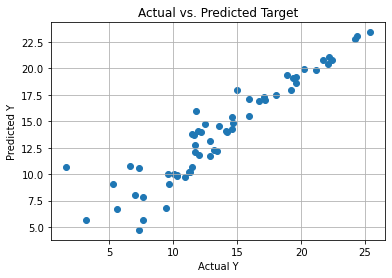

In [28]:
plt.scatter(y_test, lin_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

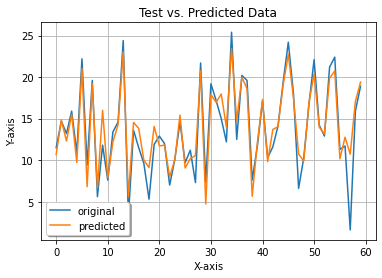

In [29]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, lin_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

# SGD Regression

In [30]:
# why is scaling needed here in gradient descent?


In [32]:
from sklearn.preprocessing import StandardScaler
#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



# or


scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
from sklearn.preprocessing import StandardScaler

print("SGD Regression")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared on Train:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()

SGD Regression
R-squared on Train: 0.9159766616388139
SGD Regressor Model Accuracy on Test: 84.819014 %

MAE: 1.5533165287948885
MSE: 4.8258908394219855
RMSE: 2.4129454197109927



/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


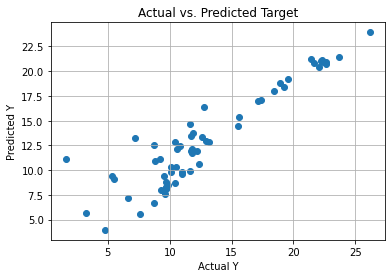

In [34]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

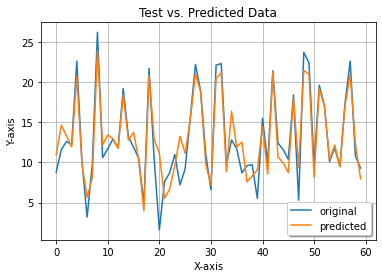

In [35]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, sgd_y_pred, label="predicted")
plt.title("Test vs. Predicted Data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [36]:
# y_test,sgd_y_pred/

In [37]:
from tabulate import tabulate

#Performing evaluation matrix comparison
model_table = pd.DataFrame(columns = ["Comparison Matrix", "LR Model", "SGD Model"])
model_table["Comparison Matrix"] = ["Accuracy (Variance Score)", "R2 Score", "MAE", "MSE", "RMSE"]
model_table["LR Model"] = [lin_accuracy, lin_score, lin_mae, lin_mse, lin_rmse]
model_table["SGD Model"] = [sgd_accuracy, sgd_score, sgd_mae, sgd_mse, sgd_rmse]

print(tabulate(model_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+----+---------------------------+------------+-------------+
|    | Comparison Matrix         | LR Model   | SGD Model   |
|----+---------------------------+------------+-------------|
| 0  | Accuracy (Variance Score) | 86.8813    | 84.819      |
| 1  | R2 Score                  | 0.910605   | 0.915977    |
| 2  | MAE                       | 1.36666    | 1.55332     |
| 3  | MSE                       | 3.9112     | 4.82589     |
| 4  | RMSE                      | 1.9556     | 2.41295     |
+----+---------------------------+------------+-------------+


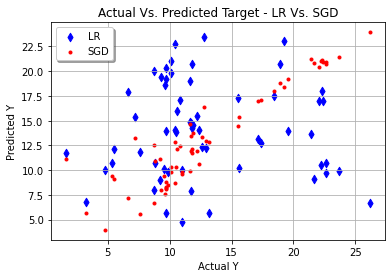

In [38]:
plt.scatter(y_test, lin_y_pred, c="b", marker="d", label='LR')
plt.scatter(y_test, sgd_y_pred, c="r", marker=".", label='SGD')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual Vs. Predicted Target - LR Vs. SGD')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid()
plt.show()

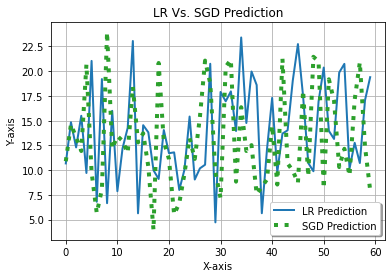

In [39]:
x_ax = range(len(sgd_y_pred))
plt.plot(x_ax, lin_y_pred, c="C0", linestyle="-", linewidth = 2, label="LR Prediction")
plt.plot(x_ax, sgd_y_pred, c="C2", linestyle=":", linewidth = 4, label="SGD Prediction")
plt.title("LR Vs. SGD Prediction")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [40]:
prediction_table = pd.DataFrame(columns=["Actual Value", "LR Predicted Value", "SGD Predicted Value"])
prediction_table["Actual Value"] = y_test
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred


print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+----------------+----------------------+-----------------------+
|     | Actual Value   | LR Predicted Value   | SGD Predicted Value   |
|-----+----------------+----------------------+-----------------------|
| 72  | 8.8            | 10.6812              | 10.9011               |
| 135 | 11.6           | 14.8453              | 14.6331               |
| 115 | 12.6           | 12.2985              | 13.3148               |
| 116 | 12.2           | 15.495               | 11.9337               |
| 52  | 22.6           | 9.71617              | 20.6879               |
| 157 | 10.1           | 21.0404              | 9.78382               |
| 155 | 3.2            | 6.80814              | 5.66762               |
| 129 | 9.7            | 19.2061              | 8.0624                |
| 183 | 26.2           | 6.66498              | 23.9379               |
| 9   | 10.6           | 15.9955              | 12.1765               |
| 100 | 11.7           | 7.87672              | 13.4423         

In [41]:
from sklearn.preprocessing import StandardScaler
#Splitting the data to test and train
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)



# # or


# scaler = StandardScaler().fit(x_train)
# x_train = scaler.transform(x_train)
# x_test = scaler.transform(x_test)

In [43]:
print("SGD Regression")
sgd_reg = SGDRegressor()
sgd_reg.fit(x_train, y_train)
sgd_score = sgd_reg.score(x_train, y_train)
print("R-squared on Train:", sgd_score)

sgd_y_pred = sgd_reg.predict(x_test)
sgd_accuracy = explained_variance_score(y_test, sgd_y_pred)
sgd_accuracy = round(sgd_accuracy*100, 6)
print("SGD Regressor Model Accuracy on Test:", sgd_accuracy, "%")
print()

sgd_mae = mean_absolute_error(y_test, sgd_y_pred)
sgd_mse = mean_squared_error(y_test, sgd_y_pred)
sgd_rmse = sgd_mse*(1/2.0)

print("MAE:", sgd_mae)
print("MSE:", sgd_mse)
print("RMSE:", sgd_rmse)
print()
sgd_y_pred

SGD Regression
R-squared on Train: -4.129574589409111e+24
SGD Regressor Model Accuracy on Test: -9.798872659748452e+25 %

MAE: 8737924580109.75
MSE: 1.0157172974516444e+26
RMSE: 5.078586487258222e+25



/usr/local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4.03586972e+12, 5.32269740e+12, 1.16771300e+13, 8.52325413e+12,
       1.16294600e+13, 1.32702909e+13, 1.44694363e+13, 7.07381169e+12,
       1.60423873e+13, 7.03628067e+12, 9.54829764e+12, 1.45342013e+13,
       4.12600640e+12, 1.84572487e+12, 1.79664349e+13, 8.13470166e+12,
       4.96204813e+12, 8.15583907e+12, 3.13376051e+12, 8.60195802e+12,
       6.68058103e+12, 4.63379914e+12, 1.47837148e+12, 1.57680881e+13,
       1.56060822e+13, 1.25152130e+13, 3.13945819e+12, 2.92967582e+12,
       1.94044795e+13, 3.06211475e+12, 1.01084712e+12, 2.24808265e+12,
       5.41684850e+12, 5.08230596e+12, 6.46951380e+12, 1.21034708e+13,
       1.08308557e+13, 1.75891657e+13, 9.46504323e+12, 5.24850360e+12,
       6.64609445e+12, 3.83570138e+12, 9.85699241e+12, 1.33419100e+13,
       1.71745796e+13, 1.15825869e+13, 1.25406956e+13, 5.02860334e+12,
       9.49604604e+11, 4.09632979e+12, 1.35453885e+13, 8.06616637e+12,
       1.62983426e+13, 1.24206846e+13, 6.20184466e+12, 3.21510496e+12,
      

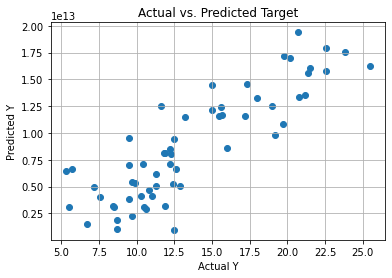

In [44]:
plt.scatter(y_test, sgd_y_pred)
plt.grid()
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.title('Actual vs. Predicted Target')
plt.show()

In [45]:
prediction_table = pd.DataFrame(columns=["Actual Value", "LR Predicted Value", "SGD Predicted Value"])
prediction_table["Actual Value"] = y_test
prediction_table["LR Predicted Value"] = lin_y_pred
prediction_table["SGD Predicted Value"] = sgd_y_pred


print(tabulate(prediction_table, headers = 'keys', tablefmt = 'psql', numalign="left"))

+-----+----------------+----------------------+-----------------------+
|     | Actual Value   | LR Predicted Value   | SGD Predicted Value   |
|-----+----------------+----------------------+-----------------------|
| 172 | 7.6            | 10.6812              | 4.03587e+12           |
| 191 | 9.9            | 14.8453              | 5.3227e+12            |
| 62  | 15.7           | 12.2985              | 1.16771e+13           |
| 167 | 12.2           | 15.495               | 8.52325e+12           |
| 23  | 15.5           | 9.71617              | 1.16295e+13           |
| 64  | 18             | 21.0404              | 1.32703e+13           |
| 169 | 15             | 6.80814              | 1.44694e+13           |
| 1   | 10.4           | 19.2061              | 7.07381e+12           |
| 39  | 21.5           | 6.66498              | 1.60424e+13           |
| 66  | 9.5            | 15.9955              | 7.03628e+12           |
| 136 | 9.5            | 7.87672              | 9.5483e+12      